# MODELO CLUSTER - WINE QUALITY

Essa análise tem como objetivo a análise do dataset de vinhos com o objetivo de identificar os seus tipos com base em clusters usando algoritmos como KNN e K-Means por exemplo.

Anteriormente já fiz uma análise com o mesmo dataset, mas no caso foi beseado em uma análise com classificação tipo supervisionada. Agora será feito uma análise com aprendizagem não supervisionada, ou seja, vamos identificar os tipos de vinhos sem dar pistas ao modelo com um dataset de treino. 

## 1 - Carga de pacotes e dados

Nesta seção temos a carga dos dados e dos pacotes necessários para realizar a análise via cluster e bem como as versões utilizadas para os pacotes.

In [1]:
# Pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
from matplotlib import pylab
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Modelo Cluster - Wine Quality" --iversions

Author: Modelo Cluster - Wine Quality

matplotlib: 3.6.2
pandas    : 1.5.2
numpy     : 1.23.5



In [3]:
# Carga das duas bases, com vinho tinto e vinho branco

bd_red = pd.read_csv('C:/python_scripts/wine_cluster/dados/winequality-red.csv', sep = ';', decimal = '.') #Vinho tinto
bd_white = pd.read_csv('C:/python_scripts/wine_cluster/dados/winequality-white.csv', sep = ';', decimal = '.') #Vinho branco

print('O número de linhas e colunas do bd_red é: ', bd_red.shape)
print('O número de linhas e colunas do bd_white é: ', bd_white.shape)

O número de linhas e colunas do bd_red é:  (1599, 12)
O número de linhas e colunas do bd_white é:  (4898, 12)


In [4]:
# União do dataset em um só
bd = bd_red.append(bd_white)
print('O número de linhas e colunas do dataset total é: ', bd.shape)

O número de linhas e colunas do dataset total é:  (6497, 12)


## 2 - Análise Exploratória Dados Iniciais

Nesta seção vamos analisar um pouco de como os dados podem estar relacionados e fazer alguns testes estatísticos. Caso seja necessário, podemos incluir novas análises após a fase de pré-processamento dos dados. O objetivo é tratar valores nulos e realizar testes de normalidade, se for necessário. 

Como já foi feito uma análise em linguagem R, não será o foco desse script.

In [5]:
# Visualiza os dados
bd.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# Resumo geral do dataset
bd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


Todos os dados estão como float64 e não temos registros de valores nulos na base.

In [7]:
# Resumo estatístico do dataset
bd.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [8]:
# Análise da mediana e média
# Caso ambas estejam próximas, é um ótimo indicador que os dados estão normalizados
# Em caso negativo, precisa aplicar normalização nos dados

# Remove variável 
bd_med = bd.iloc[:,0:11]

# Determinando um range de K
k_range = range(0,11)

# Cálculo da mediana
mediana = [statistics.median(bd_med.iloc[:,k]) for k in k_range]

#Cálculo da média
media = [statistics.mean(bd_med.iloc[:,k]) for k in k_range]


#Nome das colunas
nomes_colunas = list(bd_med.columns)

# Cria o dataframe Pandas
data = {'Atributos': nomes_colunas,
        'Mediana': mediana,
        'Media': media
        }

base_med = pd.DataFrame(data)

# Visualiza o dataframe
base_med.head()

,Atributos,Mediana,Media
0,fixed acidity,7.000,7.215307
1,volatile acidity,0.290,0.339666
2,citric acid,0.310,0.318633
3,residual sugar,3.000,5.443235
4,chlorides,0.047,0.056034


As médias estão um pouco distantes das medianas na maioria dos casos, a diferença precisa estar próxima de 0. Nesse caso será necessário aplicar a normalização dos dados. Outro ponto que colabora para isso é que os dados possuem diferentes métricas, uma das premissas para a normalização dos dados também para evitar análises erradas no treino do modelo preditivo.

Vamos seguir com os dados sem a normalização e depois normalizar para comparar os resultados

## 3 - Pré Processamento

Nesta seção vamos realizar as transformações necessárias nos dados para aplicação da análise via cluster.

In [9]:
# Remove a variável quality porque contém a classe do dataset
bd_cluster = bd.iloc[:,0:11]
bd_cluster.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [10]:
# Aplica redução de dimensionalidade

pca = PCA(n_components = 2).fit_transform(bd_cluster)

# 4 - Modelo Cluster

Nesta seção vamos aplicar os algoritmos de cluster nos dados pré-processados na etapa 3.

In [11]:
# Determinando um range de K
k_range = range(1,20)

In [12]:
# Aplicando o modelo K-Means para cada valor de K (esta célula pode levar bastante tempo para ser executada)
k_means_var = [KMeans(n_clusters = k).fit(pca) for k in k_range]

In [13]:
# Ajustando o centróide do cluster para cada modelo
centroids = [X.cluster_centers_ for X in k_means_var]

In [14]:
# Calculando a distância euclidiana de cada ponto de dado para o centróide
k_euclid = [cdist(pca, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis = 1) for ke in k_euclid]

In [15]:
# Soma dos quadrados das distâncias dentro do cluster
soma_quadrados_intra_cluster = [sum(d**2) for d in dist]

In [16]:
# Soma total dos quadrados
soma_total = sum(pdist(pca)**2)/pca.shape[0]

In [17]:
# Soma dos quadrados entre clusters
soma_quadrados_inter_cluster = soma_total - soma_quadrados_intra_cluster

Text(0.5, 1.0, 'Variância Explicada x Valor de K')

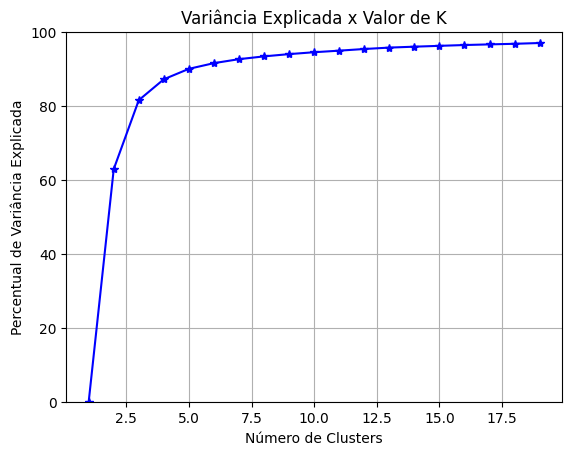

In [18]:
# Curva de Elbow
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, soma_quadrados_inter_cluster/soma_total * 100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Número de Clusters')
plt.ylabel('Percentual de Variância Explicada')
plt.title('Variância Explicada x Valor de K')

In [19]:
# Criando um modelo com K = 7
modelo_v1 = KMeans(n_clusters = 7)
modelo_v1.fit(pca)

KMeans(n_clusters=7)

In [20]:
# Obtém os valores mínimos e máximos e organiza o shape
x_min, x_max = pca[:, 0].min() - 5, pca[:, 0].max() - 1
y_min, y_max = pca[:, 1].min() + 1, pca[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = modelo_v1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 5 - Análise dos resultados

Seção para discussão dos resultados obtidos na etapa 4.

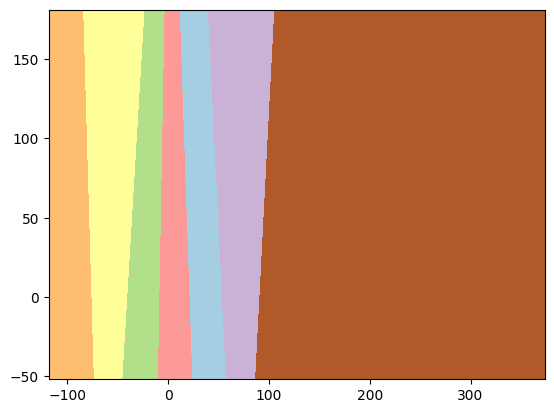

In [21]:
# Plot das áreas dos clusters
plt.figure(1)
plt.clf()
plt.imshow(Z, 
           interpolation = 'nearest',
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Paired,
           aspect = 'auto', 
           origin = 'lower')

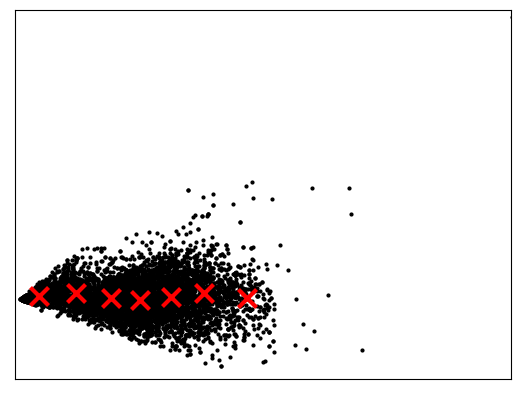

In [22]:
# Plot dos centróides
plt.plot(pca[:, 0], pca[:, 1], 'k.', markersize = 4)
centroids = modelo_v1.cluster_centers_
inert = modelo_v1.inertia_
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', s = 169, linewidths = 3, color = 'r', zorder = 8)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [43]:
# Silhouette Score
labels = modelo_v1.labels_
silhouette_score(pca, labels, metric = 'euclidean')

-0.05779590436639573

O Silhouette Score ficou abaixo de 0. Mostra que o Cluster não conseguiu determinar quais são as divisões dentro do dataset

Analisando os gráficos do cluster, não ficou muito claro quais são os clusters. Os objetos estão com uma conformidade que leva a crer que não houve uma classificação correta. Por isso, vamos normalizar os dados e aplicar novamente o algortimo para comparar os resultados.

# 6 - Normalização dos Dados

In [25]:
# Agora sim, a forma ideal de aplicar a padronização em treino e teste
# Padronização
sc = StandardScaler()
bd_normal_cluster = sc.fit_transform(bd_cluster)
bd_normal_cluster

array([[ 0.14247327,  2.18883292, -2.19283252, ...,  1.81308951,
         0.19309677, -0.91546416],
       [ 0.45103572,  3.28223494, -2.19283252, ..., -0.11507303,
         0.99957862, -0.58006813],
       [ 0.45103572,  2.55330026, -1.91755268, ...,  0.25811972,
         0.79795816, -0.58006813],
       ...,
       [-0.55179227, -0.6054167 , -0.88525328, ..., -1.42124765,
        -0.47897144, -0.91546416],
       [-1.32319841, -0.30169391, -0.12823371, ...,  0.75571005,
        -1.016626  ,  1.9354021 ],
       [-0.93749534, -0.78765037,  0.42232597, ...,  0.25811972,
        -1.41986693,  1.09691202]])

# 7 - Modelo Preditivo 2.0

Nesta seção será aplicado novamento o modelo de cluster agora com os dados normalizados

In [28]:
# Aplica redução de dimensionalidade nos dados normalizados

pca_normal = PCA(n_components = 2).fit_transform(bd_normal_cluster)
pca_normal

array([[-3.20599617,  0.41652332],
       [-3.03905081,  1.10746213],
       [-3.07189347,  0.87896444],
       ...,
       [ 0.5711325 , -0.72266165],
       [ 0.09005243, -3.54577991],
       [ 0.51257566, -2.89104008]])

In [31]:
# Aplicando o modelo K-Means para cada valor de K (esta célula pode levar bastante tempo para ser executada) nos dados normalizados
k_means_var_normal = [KMeans(n_clusters = k).fit(pca_normal) for k in k_range]

In [32]:
# Ajustando o centróide do cluster para cada modelo
centroids_normal = [X.cluster_centers_ for X in k_means_var_normal]

In [34]:
# Calculando a distância euclidiana de cada ponto de dado para o centróide
k_euclid_normal = [cdist(pca_normal, cent, 'euclidean') for cent in centroids_normal]
dist_normal = [np.min(ke, axis = 1) for ke in k_euclid_normal]

In [35]:
# Soma dos quadrados das distâncias dentro do cluster
soma_quadrados_intra_cluster_normal = [sum(d**2) for d in dist_normal]

In [36]:
# Soma total dos quadrados
soma_total_normal = sum(pdist(pca_normal)**2)/pca_normal.shape[0]

In [37]:
# Soma dos quadrados entre clusters
soma_quadrados_inter_cluster_normal = soma_total_normal - soma_quadrados_intra_cluster_normal

Text(0.5, 1.0, 'Variância Explicada x Valor de K')

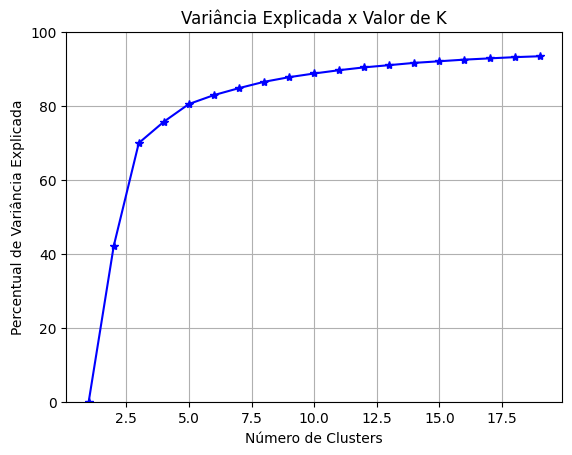

In [38]:
# Curva de Elbow
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, soma_quadrados_inter_cluster_normal/soma_total_normal * 100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Número de Clusters')
plt.ylabel('Percentual de Variância Explicada')
plt.title('Variância Explicada x Valor de K')

In [39]:
# Criando um modelo com K = 7
modelo_v2 = KMeans(n_clusters = 7)
modelo_v2.fit(pca_normal)

KMeans(n_clusters=7)

In [40]:
# Obtém os valores mínimos e máximos e organiza o shape
x_min, x_max = pca_normal[:, 0].min() - 5, pca[:, 0].max() - 1
y_min, y_max = pca_normal[:, 1].min() + 1, pca[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = modelo_v2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

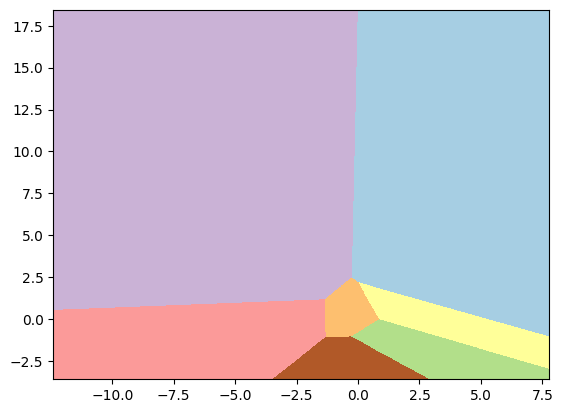

In [41]:
# Plot das áreas dos clusters
plt.figure(1)
plt.clf()
plt.imshow(Z, 
           interpolation = 'nearest',
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Paired,
           aspect = 'auto', 
           origin = 'lower')

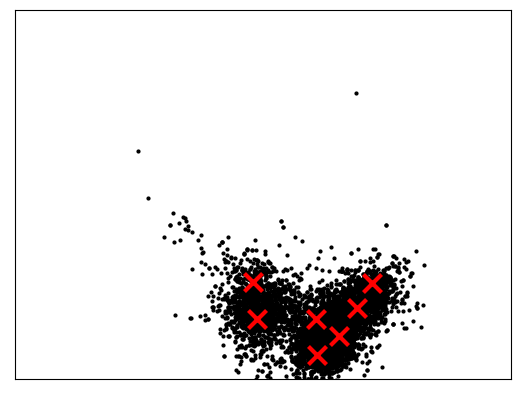

In [42]:
# Plot dos centróides
plt.plot(pca_normal[:, 0], pca_normal[:, 1], 'k.', markersize = 4)
centroids_v2 = modelo_v2.cluster_centers_
inert_v2 = modelo_v2.inertia_
plt.scatter(centroids_v2[:, 0], centroids_v2[:, 1], marker = 'x', s = 169, linewidths = 3, color = 'r', zorder = 8)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

Em comparação com o gráfico anterior dos centróides, a divisão pareceu ficar melhor. Contudo, temos 7 notas para vinhos e o algoritmo não conseguiu prever isso. Na verdade, pelo gráfico dos centroídes o algoritmo pode ter classificado em vinhos brancos e tintos porque foi feita a união dos dois datasets.

In [44]:
# Silhouette Score
labels = modelo_v2.labels_
silhouette_score(pca_normal, labels, metric = 'euclidean')

0.34923406788678224

O Silhoutte Scote fico em 0.35, mas ainda muito abaixo do ideal. Fica claro que mesmo com normalização o KMeans não conseguiu identificar os clusters com uma eficácia alta.

# 8 - Conclusão 

Ficou claro que pela aprendizagem não supervisionada tivemos um resultado abaixo do esperado, mesmo com a normalização dos dados. A próxima tentativa será com uma classificação com aprendizagem supervisionada com um balanceamento multiclasse.